In [1]:
#Exploring Coffee Chain Sales Data: Analyzing Sales Trends and Insights, we want to see how well these coffee chains are doing across different locations
import pandas as pd
import numpy as np

df = pd.read_csv('coffee.csv')
df.head(5)

,Area Code,Cogs,DifferenceBetweenActualandTargetProfit,Date,Inventory Margin,Margin,Market_size,Market,Marketing,Product_line,...,Product,Profit,Sales,State,Target_cogs,Target_margin,Target_profit,Target_sales,Total_expenses,Type
0,303,51,-35,10/1/2012,503,71,Major Market,Central,46,Leaves,...,Lemon,-5,122,Colorado,30,60,30,90,76,Decaf
1,970,52,-24,10/1/2012,405,71,Major Market,Central,17,Leaves,...,Mint,26,123,Colorado,30,60,50,90,45,Decaf
2,409,43,-22,10/2/2012,419,64,Major Market,South,13,Leaves,...,Lemon,28,107,Texas,30,60,50,90,36,Decaf
3,850,38,-15,10/3/2012,871,56,Major Market,East,10,Leaves,...,Darjeeling,35,94,Florida,40,60,50,100,21,Regular
4,562,72,6,10/4/2012,650,110,Major Market,West,23,Leaves,...,Green Tea,56,182,California,20,60,50,80,54,Regular


In [2]:
# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Remove duplicate rows from the dataframe
df.drop_duplicates(inplace=True)

# Display the first 5 rows of the dataframe
df.head(5)


,Area Code,Cogs,DifferenceBetweenActualandTargetProfit,Date,Inventory Margin,Margin,Market_size,Market,Marketing,Product_line,...,Product,Profit,Sales,State,Target_cogs,Target_margin,Target_profit,Target_sales,Total_expenses,Type
0,303,51,-35,2012-10-01,503,71,Major Market,Central,46,Leaves,...,Lemon,-5,122,Colorado,30,60,30,90,76,Decaf
1,970,52,-24,2012-10-01,405,71,Major Market,Central,17,Leaves,...,Mint,26,123,Colorado,30,60,50,90,45,Decaf
2,409,43,-22,2012-10-02,419,64,Major Market,South,13,Leaves,...,Lemon,28,107,Texas,30,60,50,90,36,Decaf
3,850,38,-15,2012-10-03,871,56,Major Market,East,10,Leaves,...,Darjeeling,35,94,Florida,40,60,50,100,21,Regular
4,562,72,6,2012-10-04,650,110,Major Market,West,23,Leaves,...,Green Tea,56,182,California,20,60,50,80,54,Regular


In [3]:
# Randomly select one row from the DataFrame and extract it as a Series
df.sample(1).iloc[0]

Area Code                                                 530
Cogs                                                      135
DifferenceBetweenActualandTargetProfit                     -9
Date                                      2015-05-09 00:00:00
Inventory Margin                                          940
Margin                                                    187
Market_size                                      Major Market
Market                                                   West
Marketing                                                 122
Product_line                                            Beans
Product_type                                         Espresso
Product                                           Caffe Mocha
Profit                                                     31
Sales                                                     322
State                                              California
Target_cogs                                               130
Target_m

In [4]:
# No null values in dataset, no cleaning needed
df.isnull().sum()

Area Code                                 0
Cogs                                      0
DifferenceBetweenActualandTargetProfit    0
Date                                      0
Inventory Margin                          0
Margin                                    0
Market_size                               0
Market                                    0
Marketing                                 0
Product_line                              0
Product_type                              0
Product                                   0
Profit                                    0
Sales                                     0
State                                     0
Target_cogs                               0
Target_margin                             0
Target_profit                             0
Target_sales                              0
Total_expenses                            0
Type                                      0
dtype: int64

In [5]:
import pandas as pd
import scipy.stats as stats

# Using chi-square test to see if there is a relation between the two categorical variables 'Product_line' and 'State'
# We specifically picked these two variables to see if there is a significant association between the rise of 'Beans' or 'Leaves' markets depending on the state theyre bought from
contingency_table = pd.crosstab(df['Product_line'], df['State'])

# Perform Chi-Square test
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

print(f'Chi-Square Statistic: {chi2}')
print(f'P-value: {p}')
print(f"Degrees of Freedom: {dof}")
print(f"Expected Frequencies: {expected}")


#Interpret if hypothesis is accepted or rejected
alpha = 0.05
if p < alpha:
    print("We reject the null hypothesis. There is a significant association between the product line and state.")
else:
    print("We fail to reject the null hypothesis. There is no significant association between the product line and state.")


Chi-Square Statistic: 38.56172945717877
P-value: 0.005030439741342204
Degrees of Freedom: 19
Expected Frequencies: [[37.83050847 34.6779661  22.06779661 28.37288136 28.37288136 28.37288136
  22.06779661 18.91525424 28.37288136 34.6779661  22.06779661 22.06779661
  25.22033898 28.37288136 22.06779661 34.6779661  22.06779661 37.83050847
  31.52542373 28.37288136]
 [34.16949153 31.3220339  19.93220339 25.62711864 25.62711864 25.62711864
  19.93220339 17.08474576 25.62711864 31.3220339  19.93220339 19.93220339
  22.77966102 25.62711864 19.93220339 31.3220339  19.93220339 34.16949153
  28.47457627 25.62711864]]
We reject the null hypothesis. There is a significant association between the product line and state.


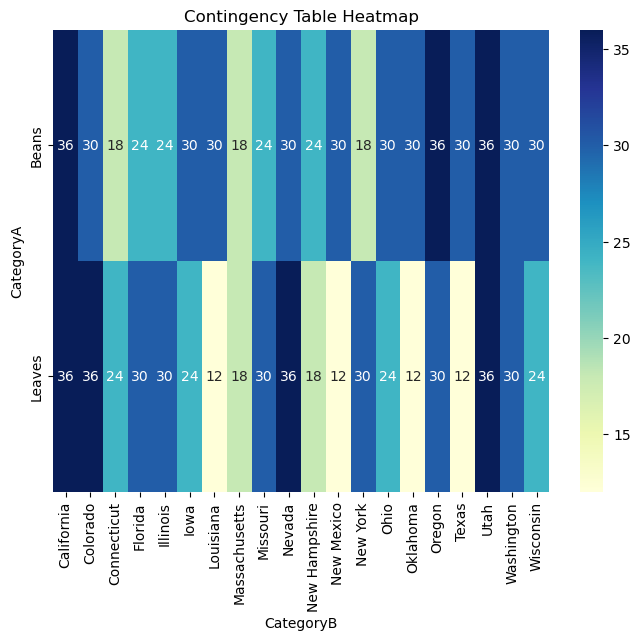

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# Create a contingency table
contingency_table = pd.crosstab(df['Product_line'], df['State'])

# Plot heatmap of contingency table
plt.figure(figsize=(8, 6))
sns.heatmap(contingency_table, annot=True, cmap='YlGnBu', cbar=True)
plt.title('Contingency Table Heatmap')
plt.xlabel('CategoryB')
plt.ylabel('CategoryA')
plt.show()
# We can see patterns where certain product lines are more prevalent in specific states, like Leaves in Colorado

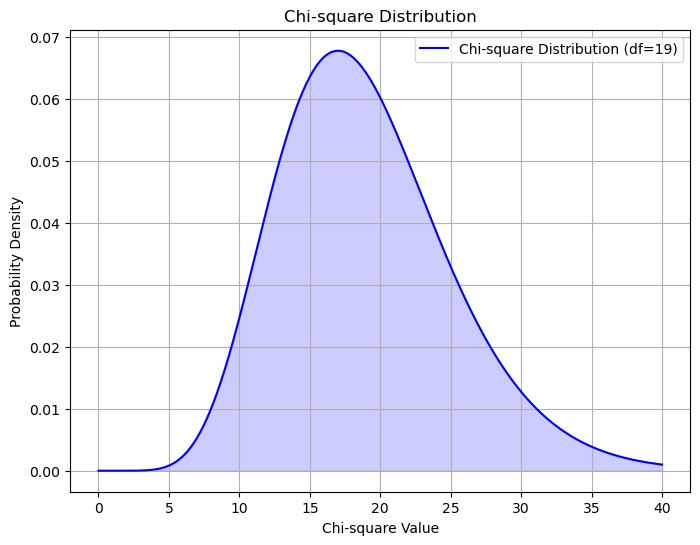

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2

# Degrees of freedom
df = 19  

x = np.linspace(0, 19, 500)  # range based on your Chi-square values
y = chi2.pdf(x, df)

# Plot Chi-square distribution
plt.figure(figsize=(8, 6))
plt.plot(x, y, 'b-', label=f'Chi-square Distribution (df={df})')
plt.fill_between(x, 0, y, where=(x >= 0), color='blue', alpha=0.2)
plt.title('Chi-square Distribution')
plt.xlabel('Chi-square Value')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()

#provides essential insights into the behavior of the Chi-square statistic under different scenarios


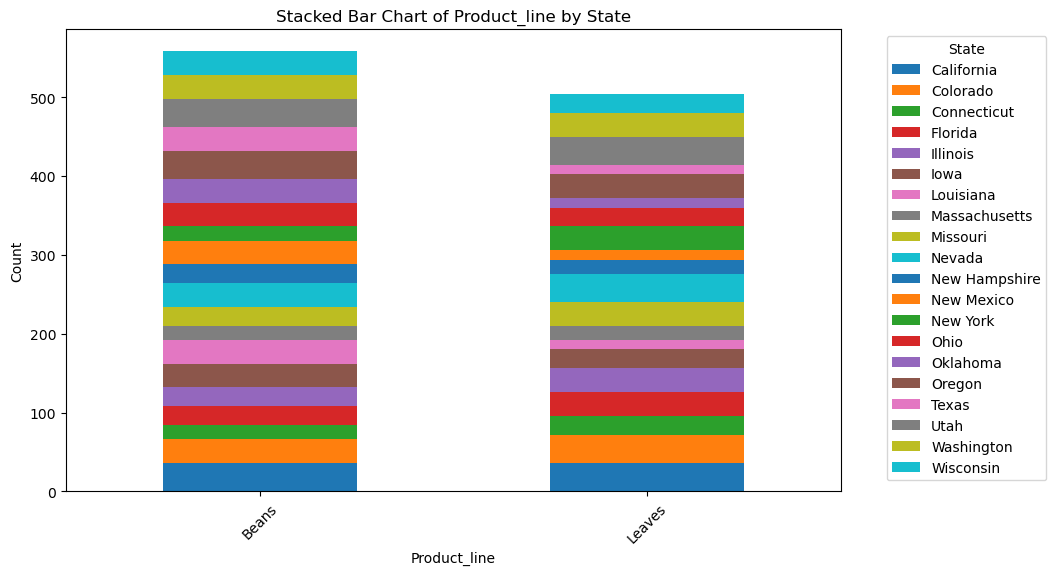

In [8]:
import matplotlib.pyplot as plt

contingency_table.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Stacked Bar Chart of Product_line by State')
plt.xlabel('Product_line')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

#Helps in identifying patterns or differences in the distribution of Product_line across different State categories.
#Useful for comparing the relative sizes of categories within each Product_line and understanding their distribution variations across State.

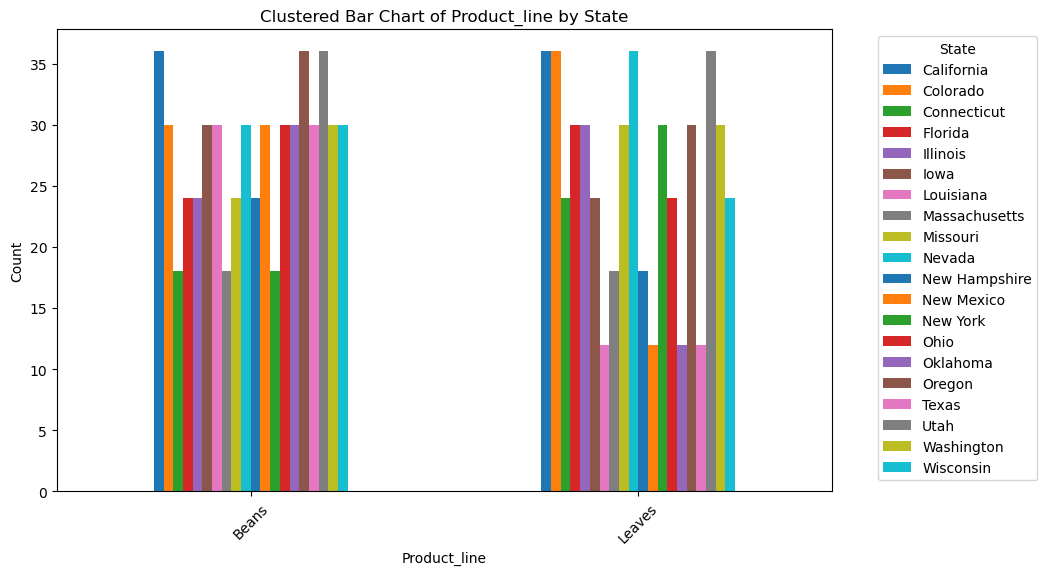

In [9]:
# Create a clustered bar chart
contingency_table.plot(kind='bar', figsize=(10, 6))
plt.title('Clustered Bar Chart of Product_line by State')
plt.xlabel('Product_line')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

#used to visually compare the counts or frequencies of 'Product_line' across 'State'
#legend shows which color corresponds to each State, making it easier to interpret the counts of Product_line categories in different State groups.